# Income Classification - Akhil Kunam, Sebastian Poellinger, Yuri Han
### Project Topic
Our project's goal is to classify individual income as above 50k per year or less than 50k per year based on various attirbutes. There are 14 features such as age, workclass, education, and race. We will use these features to classify each individual into their income group. We chose this topic as it is a way to allow us to determine if certain factors cause people to earn more than others and possibly explain some income inequality. Another reason was that this data is easily classifiable so it can help us master some classifcation models.


### Data
Data Source Link: http://archive.ics.uci.edu/ml/datasets/Adult
We got our data from UCI. UCI has a "Center for Machine Learning and Intelligent Systems" which provides the public around 500 data sets. It is based off of census data  from 1994 and has 48,842 samples split into 32,561 data points for training and 16281 data points for testing. Each data point has its relevant 14 features as well as its classification as "<=50k" or ">50k". The 14 features break down as 6 numeric and 8 categorical. Below is a breakdown for each feature 

Age: Numerical value representing age of the individual 

Workclass: Categorical value representing if the individual is self employed, working for government, private, etc. There are 8 values for this field. 

Fnlwgt: This is a numerical value that tells us how many people this sample represents as believed by the census. 

Education: Categorical value representing the highest level of education for the individual. There are 16 values for this.  

Education-num: Numerical value that represents the highest level of education as the corresponding grade number. 

Marital-status: Categorical variable with 7 values representing the status of the individuals marriage. 

Occupation: Categorical variable with 14 values representing the type of work the individual does. 

Relationship: Categorical variable with 6 values representing the individuals relationship status. 

Race: Categorical value with 5 values showing the race of the individual. 

Sex: Categorical value representing the gender of the person. 

Capital-gain: Numerical value representing how much the individual gained when selling investments. 

Capital-loss: Numerical value representing how much the individual lost when selling investments. 

Hours-per-week: Numerical value representing how many hours the individual works per week. 

Native-country: Categorical variable with 41 values representing the individuals native country. 


### Data Cleaning

For our data cleaning we first started off by finding which columns had '?' as a value. When we were doing a rough skim over the csv files we saw that all the unknown values were represented as '?' so we wanted to know in which columns those were found and how we can go about fixing them. We learned that they were in the workclass, occupation, and native-country columns. For the workclass and native country features we saw that the most common feature was found way more than the second most common so we decided to impute the '?' values as the most common value for the feature since it was likely it would be that value. For occupation the counts for each value were around the same so we couldn't impute them and decided to leave those values as is. We did dropna to make sure we didn't have any samples with a NaN value for any of their features. 

Next we wanted to convert the income classification from a string to a numeric value that would be easily used for our models. We did this through the map function for the dataframe. We also learned that the 'fnlwgt' feature was mainly only important for the people reading the census and had no effect on the income so we decided it would be best to drop that feature. 

We printed out the values for all the features we had left and saw that the education and education-num features were the exact same since education-num was the numerical representation of the value in the education feature. We decided that we can drop education as we have all that information already in the education-num column. 

We also did data type munging since we had several categorical features and wanted to convert them to numeric so that our models would be able to use them. We used sklearn's LabelEncoder to do this for us. It would take the values and change them to a number. 

Furthermore a PCA was done in order to decrease the complexity of the data set, as we suspected there were features, which did not add much value. One example is the marital status and the relationship column. They seem to overlap if you look at what they are trying to say.

In [24]:
import pandas as pd
import sklearn as sk
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [5]:
names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]
df = pd.read_csv("./data/adult.data", names=names, skipinitialspace=True)
df_test = pd.read_csv("./data/adult.test", names=names, skipinitialspace=True)

In [9]:
#Count all the ? entries for each featuree
for column in df.columns:
    print(column + ": {}".format((df[column] == '?').sum()))

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education-num: 0
marital-status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital-gain: 0
capital-loss: 0
hours-per-week: 0
native-country: 583
income: 0


In [10]:
df["workclass"] = df["workclass"].replace('?', 'Private')
df["native-country"] = df["native-country"].replace('?', 'United-States')

df_test["workclass"] = df_test["workclass"].replace('?', 'Private')
df_test["native-country"] = df_test["native-country"].replace('?', 'United-States')

df.dropna(inplace=True)
df_test.dropna(inplace=True)

In [11]:
#make the income numerical
# print((df["income"] == ' <=50K').sum())
df["income"] = df["income"].map({"<=50K":0, ">50K":1})
df_test["income"] = df_test["income"].map({"<=50K.":0, ">50K.":1})
#drop fnlweight as it is only interesting for the census authorities
df = df.drop(labels="fnlwgt", axis=1)
df_test = df_test.drop(labels="fnlwgt", axis=1)




In [12]:
for column in df.columns:
    print(df[column].value_counts())

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64
Married-

The cells education and education-num are equal, which means we can drop the non numerical education column.

In [13]:
df = df.drop(labels="education", axis=1)
df_test = df_test.drop(labels="education", axis=1)

In [14]:
train_x = df.drop(labels="income", axis=1)
train_y = df["income"]
test_x = df_test.drop(labels="income", axis=1)
test_y = df_test["income"]

In [15]:
#convert the categorical data to numerical
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
features_to_encode = ["workclass", "marital-status", "occupation", "relationship", "race", "sex", "native-country"]
for feature in features_to_encode:
    train_x[feature] = le.fit_transform(train_x[feature])
    test_x[feature] = le.fit_transform(test_x[feature])

train_x.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,13,4,1,1,4,1,2174,0,40,38
1,50,5,13,2,4,0,4,1,0,0,13,38
2,38,3,9,0,6,1,4,1,0,0,40,38
3,53,3,7,2,6,0,2,1,0,0,40,38
4,28,3,13,2,10,5,2,0,0,0,40,4


In [21]:
#perform pca to see if we can drop even more columns which might be correlated. 
#martial status and relationship seem pretty similar to begin with
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#use labelencoder to encode the string labels to int


#scales the data to the standard normal, as is required for pca of sklearn
scaler = StandardScaler()
scaler.fit(train_x)
train_x_norm = scaler.transform(train_x)
test_x_norm = scaler.transform(test_x)

pca = PCA(0.90)
pca.fit(train_x_norm)

train_x_pca = pca.transform(train_x_norm)
test_x_pca = pca.transform(test_x_norm)
print(train_x_pca.shape)

(32561, 10)


After our initial cleaning we reduced our features to 10 while still accounting for 90% of the variance.

### EDA

For the EDA we started with plotting all of the features with their frequency. There seem to be some features, that are very biased to one value. These features are country, capital-loss, capital-gain and we assume they might not add any value to our classifier. 

We also created a heatmap of the correlation of all the features. The result supports our initial claim, that relationship and marital-status are dependent on each other, as they show positive correlation. Another ineresting find is the negative relation between sex and relationship.

With the results from the EDA we can conclude that some of our features don´t add value to our model, as their results tend to be mostly centered at one value. As another finding we can conclude that either marital-status and relationship are redundand, as they are highly similar.

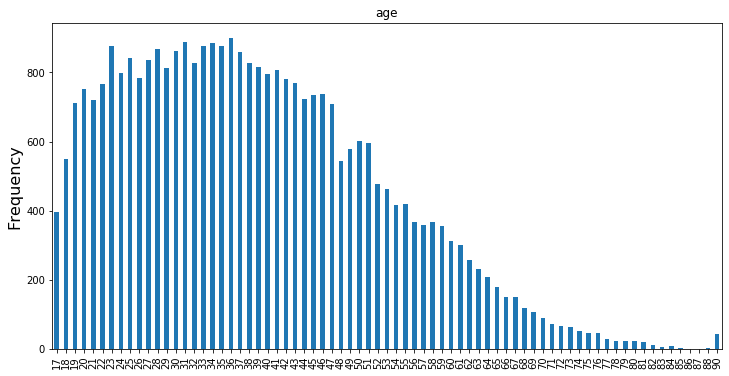

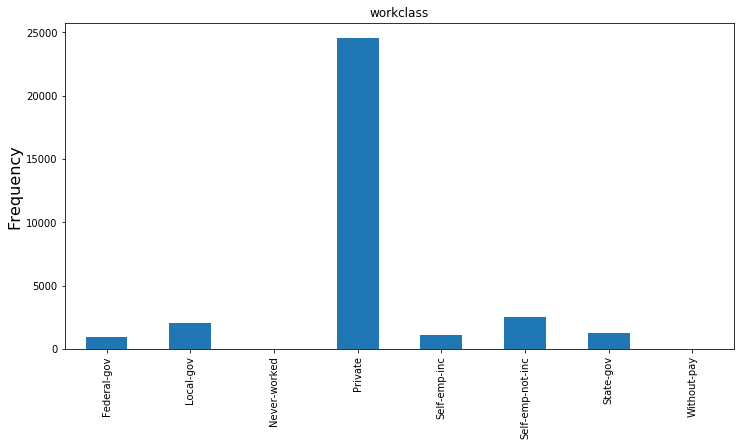

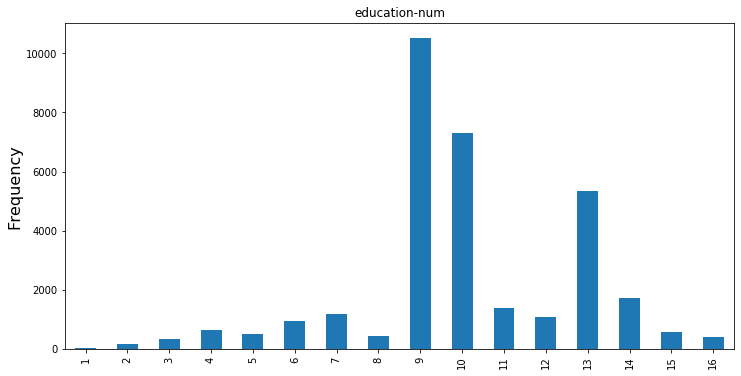

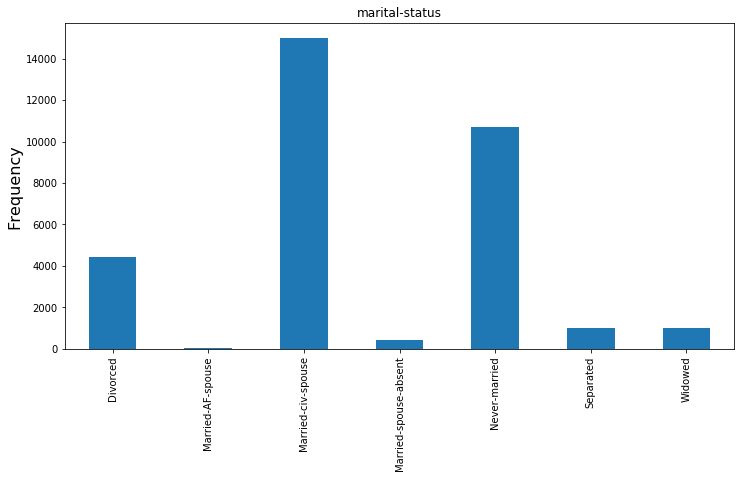

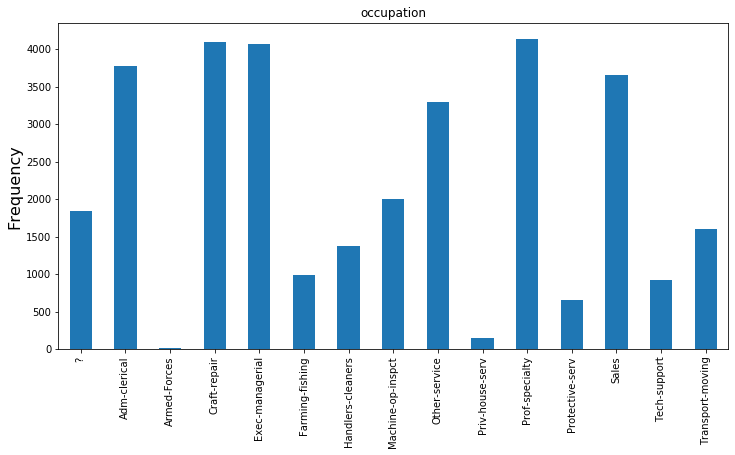

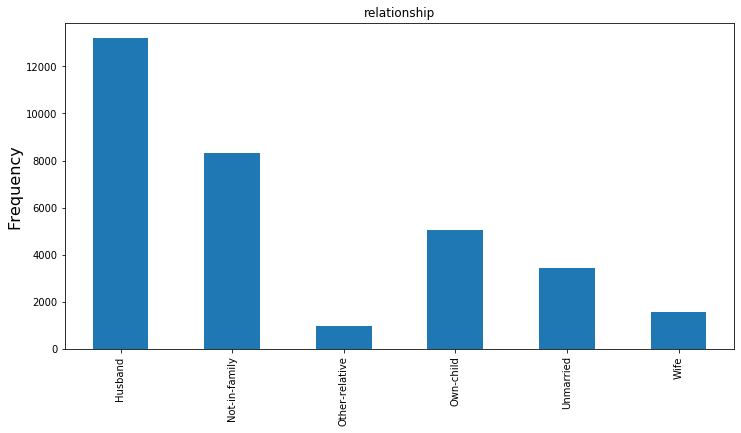

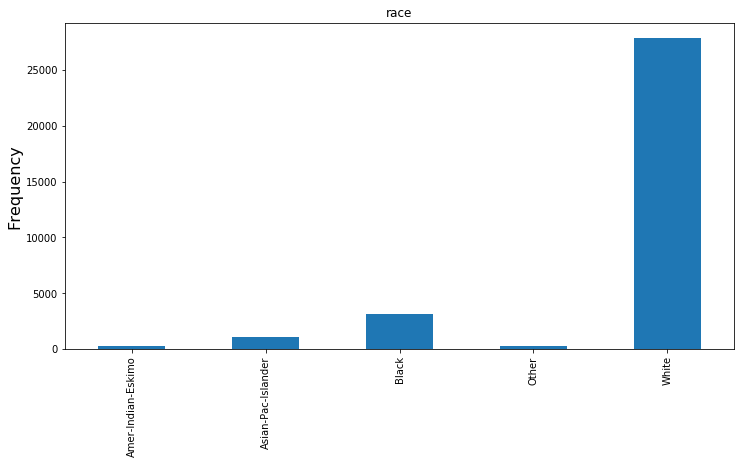

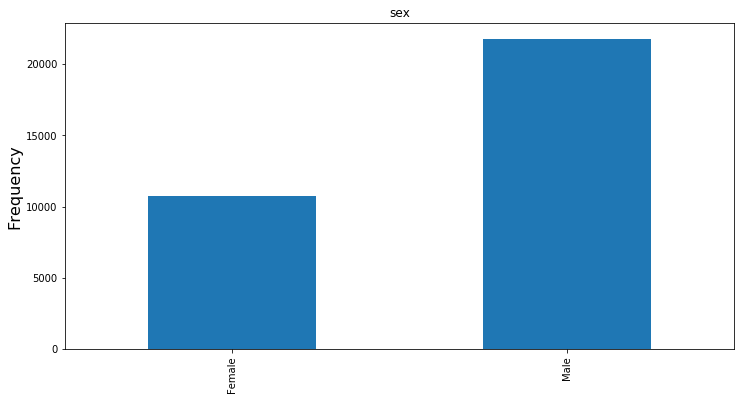

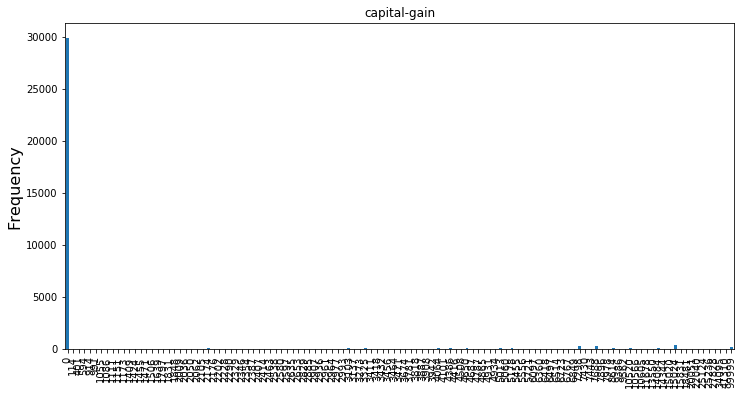

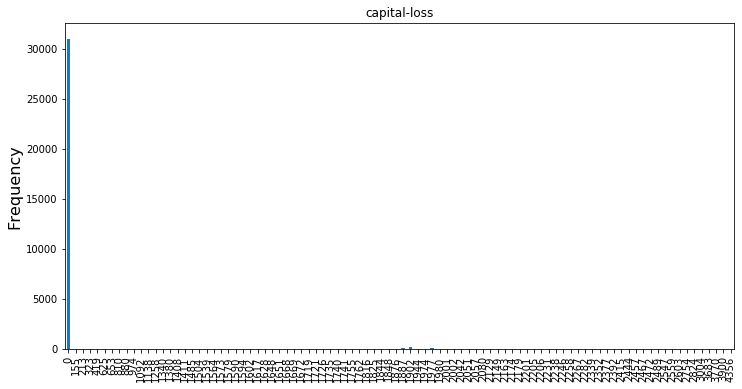

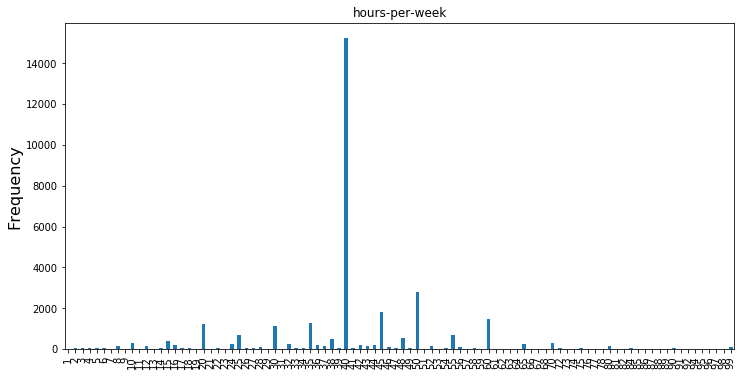

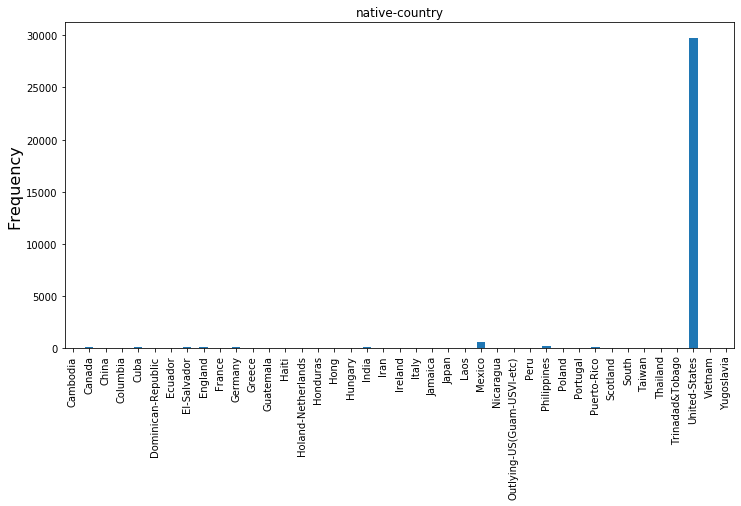

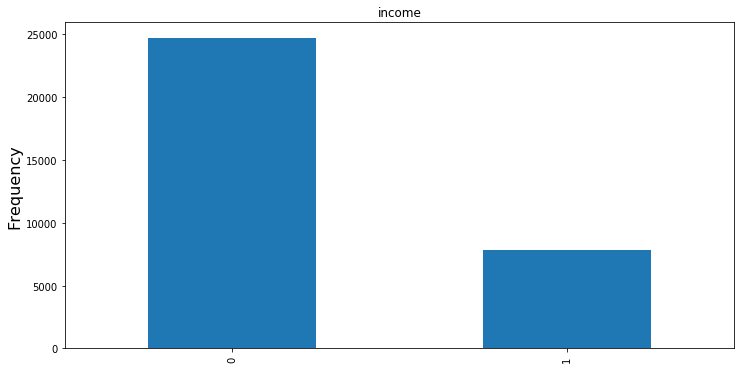

In [33]:
 #visualization of each column in frequency
 for column in df.columns:
     values = df[column].value_counts().sort_index()
     categories = df[column].unique()
     ax = values.plot.bar(title=column, figsize=(12,6))
     ax.set_ylabel("Frequency", fontsize=16)
     plt.show()

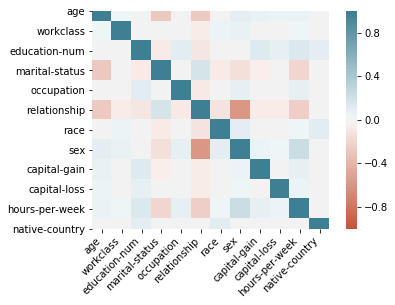

In [32]:
corr = train_x.corr()
ax = sn.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [258]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=0, n_estimators = 100, n_jobs = -1, )

model.fit(train_x, train_y)
model.score(test_x, test_y)

0.8533873840673177

In [171]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [50] #This should always be best at higher numbers. Using low number so we can test many of the other hyperparams

# criterion = ['gini', 'entropy']
# max_depth = [None, 10, 25, 50]
# min_samples_split = [2, 5, 10, 25]
# min_samples_leaf = [1, 2, 5, 10, 25]
# min_weight_fraction_leaf = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
# max_features = ['auto', 'sqrt', 'log2', None]
# max_leaf_nodes = [None, 1, 2, 5, 10, 25]
# min_impurity_decrease = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
# # min_impurity_split = [] Deprecated 
# bootstrap = [True, False]
# oob_score = [True, False]
# class_weight = [None, 'balanced', 'balanced_subsample']
# ccp_alpha = [0, 0.1, 0.25, 0.5, 0.75, 0.9]
# max_samples = [None, 0.1, 0.25, 0.5, 0.75, 0.9]

# After a few runs we narrowed down the hyper params
criterion = ['gini', 'entropy']
max_depth = [None, 1, 2, 5, 10, 25]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 5, 10]
min_weight_fraction_leaf = [0, 0.1, 0.05]
max_features = ['auto']
max_leaf_nodes = [None, 1, 2, 5, 10, 25]
min_impurity_decrease = [0, 0.05, 0.1]
# min_impurity_split = [] Deprecated 
bootstrap = [True, False]
oob_score = [False]
class_weight = [None, 'balanced', 'balanced_subsample']
ccp_alpha = [0, 0.1, 0.05]
max_samples = [None, 0.1, 0.25, 0.5, 0.75, 0.9]

hyperparams = {
    'n_estimators': n_estimators,
    'criterion': criterion,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'min_weight_fraction_leaf': min_weight_fraction_leaf,
    'max_features': max_features,
    'max_leaf_nodes': max_leaf_nodes,
    'min_impurity_decrease': min_impurity_decrease,
    'bootstrap': bootstrap,
    'oob_score': oob_score,
    'class_weight': class_weight,
    'ccp_alpha': ccp_alpha,
    'max_samples': max_samples
}

base_model = RandomForestClassifier()
optimal_model = RandomizedSearchCV(estimator = base_model, param_distributions = hyperparams, n_iter = 1000, cv = 2, verbose=3, random_state=0, n_jobs = -1)
optimal_model.fit(train_x, train_y)
print(optimal_model.best_params_)

Fitting 2 folds for each of 1000 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.6min finished


{'oob_score': False, 'n_estimators': 50, 'min_weight_fraction_leaf': 0, 'min_samples_split': 10, 'min_samples_leaf': 1, 'min_impurity_decrease': 0, 'max_samples': 0.5, 'max_leaf_nodes': None, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0, 'bootstrap': False}


In [259]:
# print(optimal_model.best_estimator_.score(test_x, test_y))
test = RandomForestClassifier(**optimal_model.best_params_)
test.set_params(n_estimators=500)
test.fit(train_x, train_y)
# test.get_params()
test.score(test_x, test_y)

0.8576868742706222

In [260]:
opt_model = RandomForestClassifier(n_estimators = 250, min_samples_split = 2, min_samples_leaf = 4, max_features = 'auto', max_depth = 20, bootstrap = False, n_jobs=-1)
# opt_model.get_params()
opt_model.fit(train_x, train_y)
opt_model.score(test_x, test_y)

0.8643817947300534

In [261]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=80, random_state=0)
ada.fit(train_x, train_y)
ada.score(test_x, test_y)

0.8728579325594251

In [262]:
ada2 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2, max_leaf_nodes=10), n_estimators=300, random_state=0, learning_rate=1)
ada2.fit(train_x, train_y)
ada2.score(test_x, test_y)

0.8718137706529083

In [263]:
ada3 = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators = 250, min_samples_split = 2, min_samples_leaf = 4, max_features = 'auto', max_depth = 20, bootstrap = False, n_jobs=-1), n_estimators=4, random_state=0, learning_rate=1)
ada3.fit(train_x, train_y)
ada3.score(test_x, test_y)


0.8700325532829679

In [266]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(train_x, train_y)
svm.score(test_x, test_y)

0.8024077145138505

In [264]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(loss="exponential", learning_rate=.2, subsample=1, n_estimators=200)
GBC.fit(train_x, train_y)
GBC.score(test_x, test_y)

0.8735335667342301

In [265]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=100, n_jobs=-1, max_samples=0.20, max_features=0.65, oob_score=True)
bag.fit(train_x, train_y)
bag.score(test_x, test_y)

0.8654873779251888